# Grafy v Pythonu - Matplotlib

### Co matplotlib umí?

- Vytvářet 2D a 3D grafy.
- Umožňuje vytvářet popisky v $\LaTeX$.
- Kontrolovat nastavení všech grafických prvků v grafu.
- Kvalitní grafický výstup, včetně formátů PNG, PDF, SVG, EPS.
- GUI pro interaktivní práci s grafy (zoomování, posouvání, atd.).

Jedna z vlastností Matplotlibu, která si zaslouží zdůraznění a která velice zjednodušuje vytváření vědeckých publikací, je možnost ovládat všechny aspekty a detaily grafu z kódu. Díky tomu můžete ihned zopakovat celý proces vytváření grafu s pozměněnými daty bez nutnosti jít znovu krok po kroku.

Více informací na stránkách projektu: [http://matplotlib.org/](http://matplotlib.org/)


In [2]:
%pip install matplotlib numpy
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt

# A samozřejmě NumPy
import numpy as np

# Občas se hodí i matematika
import math

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 816.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------------------------------- 104.6/104.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 3.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.1 MB 3.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/8.1 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.1 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 3.3 MB/s eta 0:00:03
   ----- ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\jarda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Jednoduché grafy

### Objekty a třídy v Matplotlibu

Každému prvku grafu připadá v objektovém rozhraní Matplotlibu nějaký objekt:

**Figure** - objekt reprezentující celý obrázek (může obsahovat více různých grafů). Standardně se vytváří voláním `plt.figure()`, což není konstruktor v pravém slova smyslu (funkce vrací nový objekt typu `Figure`, ale dělá toho ještě mnohem více).

**Axes** - objekt reprezentující nějakou soustavu souřadnic (jeden obdélník), do níž lze vykreslovat data. Obvykle se vytváří voláním metody `add_axes` na existujícím objektu `Figure`. Jiné způsoby si popíšeme dále.

**Line2D, ...** - každý typ grafu má vlastní třídu.

**Text** - objekt reprezentující popisky všeho druhu.


# Rozeberme si nejjednodušší graf


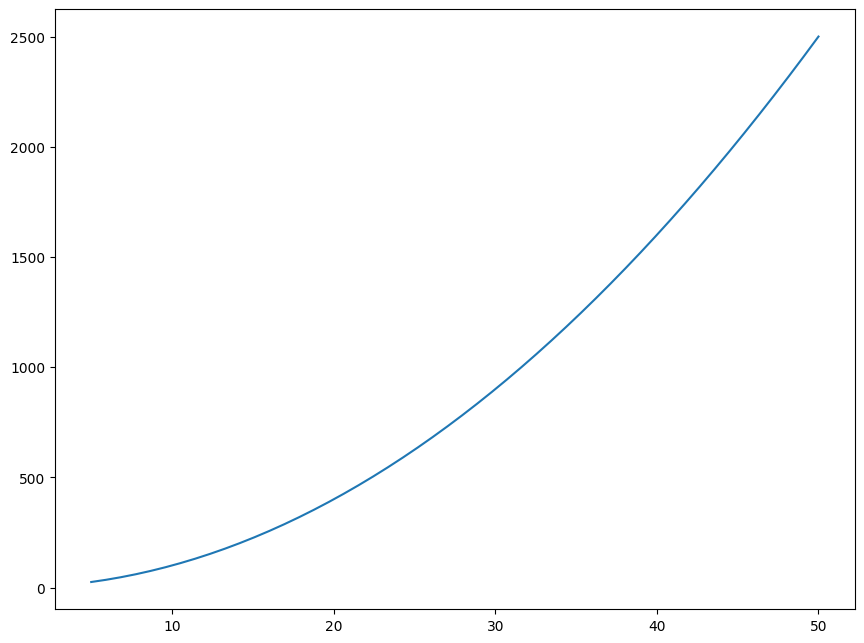

In [16]:
# Vytvoříme jednoduchá data
# (50 bodů rovnoměrně rozmístěných na úsečce -1, 5)
x = np.linspace(5, 50, 50)
# jejich druhá mocnina (tj. parabola)
y = x ** 2 

# nový objekt Figure = prázdný obrázek
fig = plt.figure(figsize=(8, 6))  # velikost obrázku v palcích (šířka, výška)

# U add_axes musíme zadat, jakou část obrázku zabere obdélník se souřadnicemi
# zleva, odspodu, šířka, výška (v relativních hodnotách 0 až 1)
axes = fig.add_axes((0.1, 0.1, 1,1))

# Nyní vykreslíme data
graf_funkce = axes.plot(x, y)
# a zobrazíme obrázek
plt.show()

In [8]:
# podívejme se na jednotlivé objekty
print(fig)
print(axes)
print(graf_funkce)

Figure(800x600)
Axes(0.1,0.1;1x1)


Takovýto graf by šel samozřejmě vykreslit i jediným příkazem `plt.plot(x, y)`, který vytvoří nový objekt `Figure` a v něm nový objekt `Axes` automaticky.

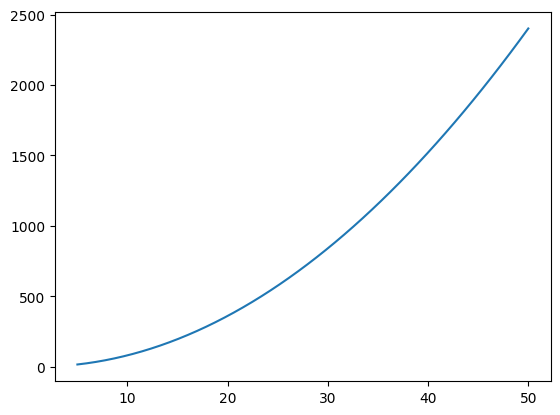

In [14]:
plt.plot(x, y)
# a zobrazíme obrázek
plt.show()

Další datovou sadu do jednoho grafu přidáme opětovným zavoláním metody `plot` pro stejný objekt `Axes`:

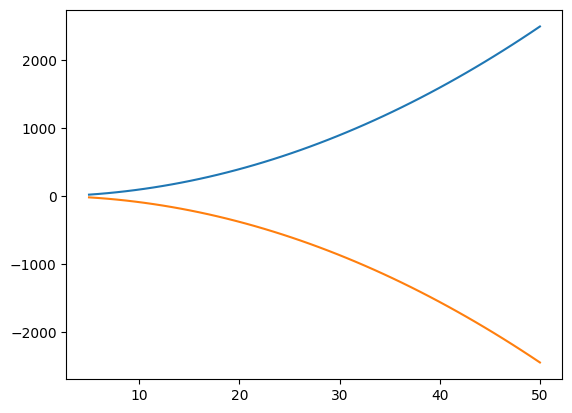

In [20]:
# Kratší získání Figure a Axes
# (pomocí rozdělení obrázku na 1x1 podgraf :-))
fig, axes = plt.subplots()

# Jen voláme vícekrát plot
axes.plot(x, y - 5)
axes.plot(x, x - y)   # druhá datová řada, se automaticky zbarví jinou barvou
# a zobrazíme obrázek
plt.show()

Nebo opětovným zavoláním metody `plot`. 

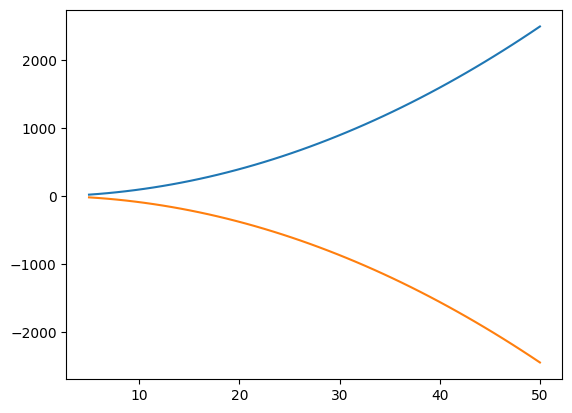

In [21]:
# Jen voláme vícekrát plot
plt.plot(x, y - 5)
plt.plot(x, x - y)   # druhá datová řada, se automaticky zbarví jinou barvou
# a zobrazíme obrázek
plt.show()

Můžeme také vložit několik dvojic datových sad za sebou:

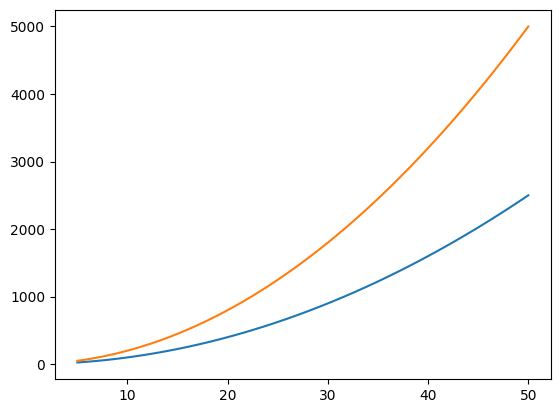

In [24]:
fix, axes = plt.subplots() 

# Dvě datové řady najednou
axes.plot(x, y, x, y * 2)
# a zobrazíme obrázek
plt.show()

(50, 2)
(50, 2)


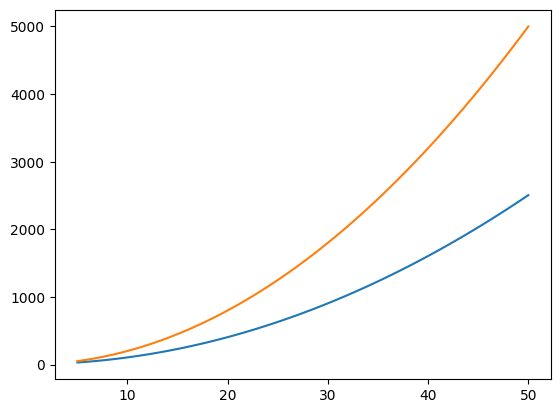

In [25]:
# více grafů najednou lze vykreslit i pomocí sloupcového zápisu
# první argument jsou souřadnice x po sloupcích 
# druhý argument jsou souřadnice y po sloupcích

# uděláme z x sloupcový vektor
x_col = x.reshape((-1,1))
# matici se dvěma sloupci x
xx = np.tile(x_col, (1,2))
print(xx.shape)

# matici se dvěma sloupci hodnot y
yy = np.hstack((x_col ** 2 + 5, 2 * x_col ** 2))
print(yy.shape)

plt.plot(xx,yy)
# a zobrazíme obrázek
plt.show()

# Popisky os (základ)

Pro přidání popisků os a nastavování dalších parametrů voláme metody objektu `Axes` (obvykle začínají na `set_`).

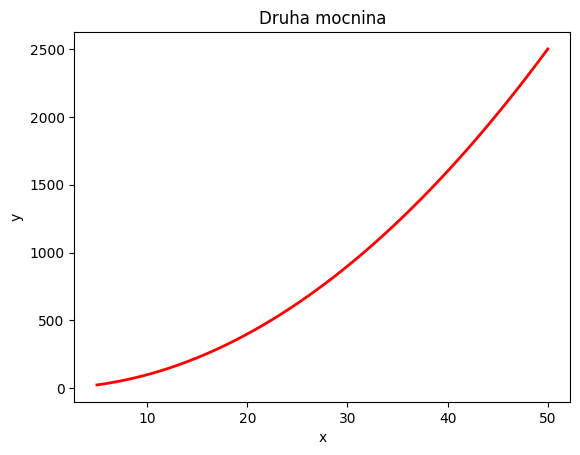

In [ ]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
axes.set_title('Druha mocnina')                 # Nastavení popisku celého grafu (soustavy souřadnic)  ;

plt.show()

Všechny popisky jsou typu **Text** a dá se s nimi pomocí metod tohoto objektu všemožně manipulovat.

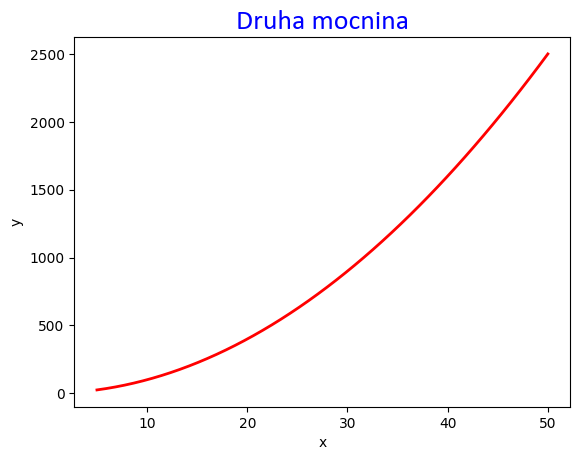

In [34]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
title_text = axes.set_title('Druha mocnina')    # Nastavení popisku celého grafu (soustavy souřadnic)

title_text.set_fontsize(20)                     # Nastavení velikosti písma
title_text.set_color('blue')                    # Nastavení barvy písma
title_text.set_fontname('Calibri')         # Nastavení fontu písma

plt.show()

Případně lze zase (v případě jednoho grafu) použít metody modulu `plt` napřímo:

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.


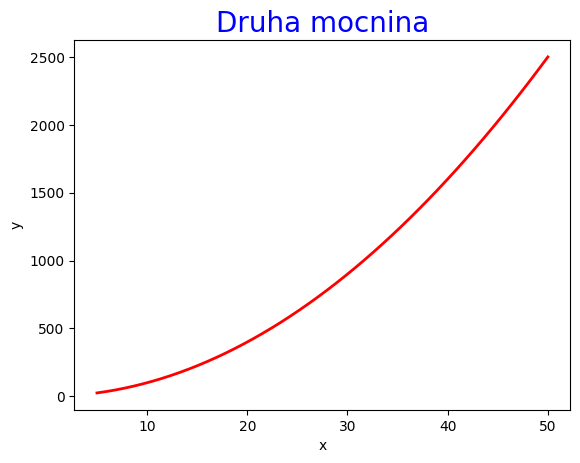

In [35]:
plt.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
plt.xlabel('x')                                # Nastavení popisku osy x
plt.ylabel('y')                                # Nastavení popisku osy y
plt.title('Druha mocnina', fontsize=20, color='blue', fontname='Nimbus Roman')  # Nastavení popisku

plt.show()

## Ukládání do souboru

K tomuto účelu slouží metoda **savefig**:

In [ ]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
title_text = axes.set_title('Druha mocnina')    # Nastavení popisku celého grafu (soustavy souřadnic)

title_text.set_fontsize(20)                     # Nastavení velikosti písma
title_text.set_color('blue')                    # Nastavení barvy písma
title_text.set_fontname('Nimbus Roman')         # Nastavení fontu písma

# Základní uložení (typ souboru podle jména)
fig.savefig("filename.png")

# Parametry
fig.savefig("filename1.png", dpi=50)

# Vektorová grafika
fig.savefig("filename.svg")
fig.savefig("filename.pdf")

# Další možnosti pro PDF výstup ("profi")
fig.savefig("filename2.pdf", bbox_inches='tight')    #-- Bez bílých okrajů
fig.savefig("filename3.pdf", bbox_inches='tight', transparent=True) #-- Bez bílých okrajů a s průhlednosti

In [ ]:
# Jednoduchý způsob, jak v Jupyter Notebooku zobrazit obrázek ze souboru
import IPython.core.display
IPython.core.display.Image(filename="filename.png")